# Example notebook to estimate significance from 2D constraint

Minh Nguyen
(Leinweber Center for Theoretical Physics, University of Michigan. Email me [HERE](mailto:nhat.minh.nguyen.111@gmail.com))

All errors are mine. Feedback and suggestion welcome!

`SignificanceBarometer` implements methods to

- Compute the significance at which posteriors reject a null hypothesis;
- Compute the difference between bestfit models given the *same* data.

TO-DO: Implement methods to compute tension between *different* data sets within the *same* model.

In [1]:
import sys, os
import getdist
from significance_barometer import SignificanceBarometer

## Usages

### Data path

In [2]:
test_chain_dir='./example_data'

### Computation

We want to load and pass `getdist.mcsamples` instances to `SignificanceBarometer`.

In [3]:
settings={'ignore_rows': '0.3', 'boundary_correction_order': '1'}
test_chain_prefix='GammaPrimefree_Omegakfixed_planck2018_highl_TTTEEE_lowl_TTEE_lensing_BAO_des_fsigma8'
test_chain_full_path=os.path.join(test_chain_dir,test_chain_prefix)
getdist_samples = getdist.mcsamples.loadMCSamples(file_root=test_chain_full_path,settings=settings)

tension = SignificanceBarometer(getdist_samples)

./example_data/GammaPrimefree_Omegakfixed_planck2018_highl_TTTEEE_lowl_TTEE_lensing_BAO_des_fsigma8.7.txt
./example_data/GammaPrimefree_Omegakfixed_planck2018_highl_TTTEEE_lowl_TTEE_lensing_BAO_des_fsigma8.6.txt
./example_data/GammaPrimefree_Omegakfixed_planck2018_highl_TTTEEE_lowl_TTEE_lensing_BAO_des_fsigma8.4.txt
./example_data/GammaPrimefree_Omegakfixed_planck2018_highl_TTTEEE_lowl_TTEE_lensing_BAO_des_fsigma8.5.txt
./example_data/GammaPrimefree_Omegakfixed_planck2018_highl_TTTEEE_lowl_TTEE_lensing_BAO_des_fsigma8.1.txt
./example_data/GammaPrimefree_Omegakfixed_planck2018_highl_TTTEEE_lowl_TTEE_lensing_BAO_des_fsigma8.2.txt
./example_data/GammaPrimefree_Omegakfixed_planck2018_highl_TTTEEE_lowl_TTEE_lensing_BAO_des_fsigma8.3.txt
./example_data/GammaPrimefree_Omegakfixed_planck2018_highl_TTTEEE_lowl_TTEE_lensing_BAO_des_fsigma8.8.txt
./example_data/GammaPrimefree_Omegakfixed_planck2018_highl_TTTEEE_lowl_TTEE_lensing_BAO_des_fsigma8.9.txt
Removed 0.3 as burn in
Receive 1 instances of 

We can then compute the significance that a sample constraint rejects a `fiducial_point` in parameter space as follows.

Replace `par_1` and `par_2` with either names or indices of the parameters in your `getdist.mcsamples` instances.

In [4]:
fiducial_point=[0.55,0.0]
pars=['gamma0','gamma1']
tension.significances = tension.compute_posterior_pvalue_2D(pars,fiducial_point,\
                                normalized=False,\
                                inner_CL=0.7,n_contours=200,convergence_threshold=1e-14)
print(tension.significances[0])

Convergence condition reached.
0.9981994857359144


Results can then be extracted into `latex` table format.

In [5]:
tension.print_latex_table()

\begin{table}
\begin{center}
\begin{tabular}{|l l|}
\hline
Data & Significance \\
\hline
GammaPrimefree\textunderscore Omegakfixed\textunderscore planck2018\textunderscore highl\textunderscore TTTEEE\textunderscore lowl\textunderscore TTEE\textunderscore lensing\textunderscore BAO\textunderscore des\textunderscore fsigma8 & 99.8% \
\hline
\end{tabular}
\label{tab:data_significance}
\end{center}
\end{table}


/Users/nguyenmn/getdist_tools/Bayesian_model_comparison/significance_barometer.py:347: Warning: No input sample names. Try to grab names from ``getdist.mcsamples``.
  warnings.warn("No input sample names. Try to grab names from ``getdist.mcsamples``.",category=Warning)
/Users/nguyenmn/getdist_tools/Bayesian_model_comparison/significance_barometer.py:353: Warning: No input sample significances. Try to grab names from ``self.significances``.
  warnings.warn("No input sample significances. Try to grab names from ``self.significances``.",category=Warning)


### Visual inspection

In [6]:
import matplotlib
from matplotlib import pyplot as plt
from getdist import plots
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['legend.framealpha']=0.

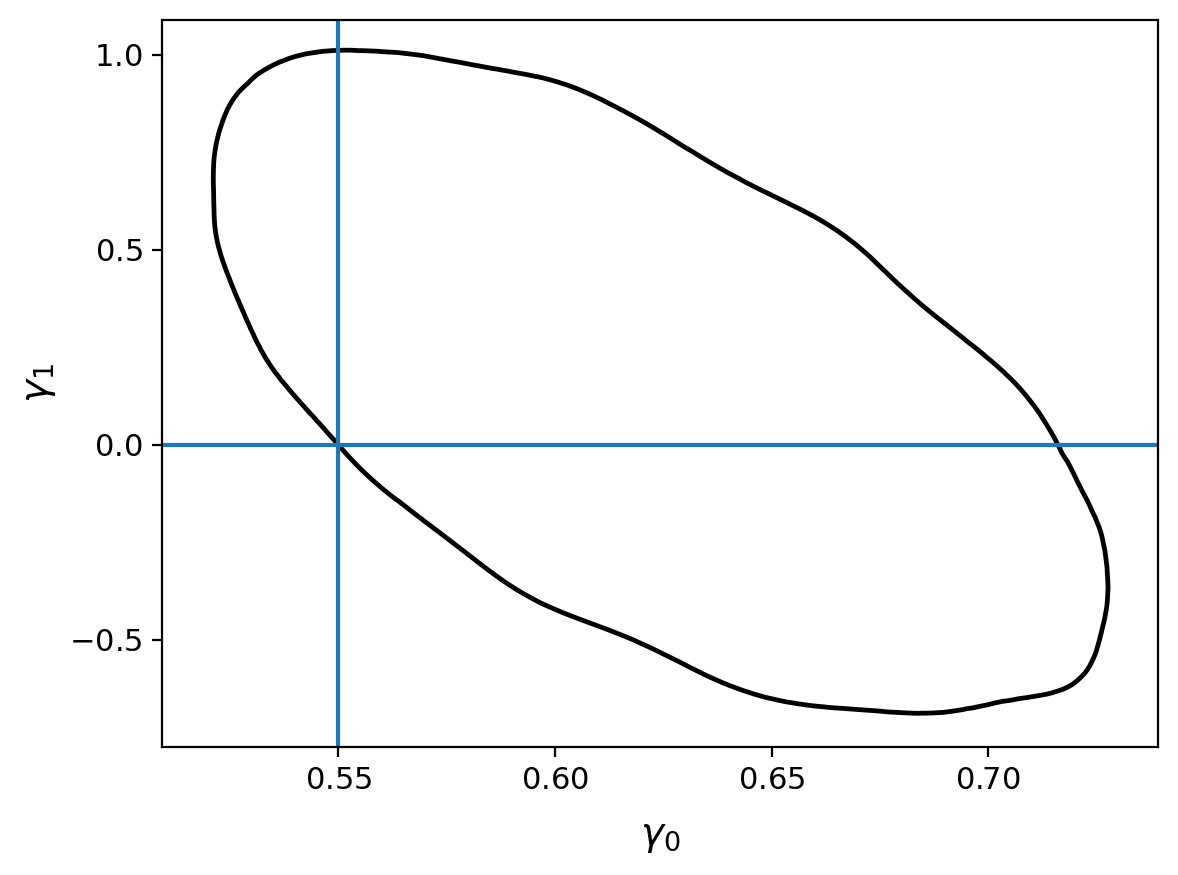

In [7]:
g = plots.get_single_plotter()
getdist_samples.updateSettings({'contours': [tension.significances[0],]})

g.settings.num_plot_contours = 1
g.plot_2d(getdist_samples, param_pair=pars);
ax=g.subplots[0,0]
ax.axvline(x=fiducial_point[0])
ax.axhline(y=fiducial_point[1])

For more details, please see `significance_barometer.py ` in the same folder.